**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

In [2]:
fdiry = file.path(FD_RES, "source", "MPRA", "MPRA_LentiMPRA_K562_Nadav")
fname = "ENCFF348WYK.bed.gz"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Start", "End", "Name", "Score", "Strand")
dat = read_tsv(fpath, col_names=FALSE)

dat_lmpra_import = dat
print(dim(dat))
head(dat)

Rows: 226631 Columns: 11
── Column specification ─────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): X1, X4, X6
dbl (8): X2, X3, X5, X7, X8, X9, X10, X11

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 226631     11


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,115631,115831,peak1_Reversed:,0,-,0.1572,0.0780,0.0735,-1,-1
chr1,138940,139140,peak2_Reversed:,0,-,0.2047,0.0510,0.0490,-1,-1
chr1,138940,139140,peak2,0,+,-0.2317,0.0790,0.0562,-1,-1
chr1,203225,203425,peak3_Reversed:,0,-,0.0023,0.0768,0.0643,-1,-1
chr1,203225,203425,peak3,0,+,0.0524,0.0834,0.0721,-1,-1
chr1,267911,268111,peak4_Reversed:,0,-,-0.3220,0.0529,0.0352,-1,-1


In [3]:
tail(dat)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrY,25051988,25052188,ENSG00000185894_Reversed:,0,+,-0.6518,0.1329,0.0713,-1,-1
chrY,25051988,25052188,ENSG00000185894,0,-,-0.5484,0.0654,0.0363,-1,-1
chrY,25307614,25307814,ENSG00000279115_Reversed:,0,-,0.0619,0.0566,0.0497,-1,-1
chrY,25307614,25307814,ENSG00000279115,0,+,-0.4995,0.0805,0.0462,-1,-1
chrY,25622201,25622401,ENSG00000172288_Reversed:,0,-,-0.4231,0.0730,0.0445,-1,-1
chrY,25622201,25622401,ENSG00000172288,0,+,-0.3133,0.0479,0.0305,-1,-1


In [4]:
dat = dat_lmpra_import
dat = dat %>% dplyr::select(X1, X2, X3, X4, X7, X6)
colnames(dat) = c("Chrom", "Start", "End", "Name", "Score", "Strand")

dat_lmpra_score_stranded = dat
print(dim(dat))
head(dat)

[1] 226631      6


Chrom,Start,End,Name,Score,Strand
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
chr1,115631,115831,peak1_Reversed:,0.1572,-
chr1,138940,139140,peak2_Reversed:,0.2047,-
chr1,138940,139140,peak2,-0.2317,+
chr1,203225,203425,peak3_Reversed:,0.0023,-
chr1,203225,203425,peak3,0.0524,+
chr1,267911,268111,peak4_Reversed:,-0.3220,-


In [5]:
dat = dat_lmpra_score_stranded
dat = dat %>% dplyr::mutate(Name = str_remove(Name, "_Reversed:"))
dat = dat %>% 
    dplyr::group_by(Chrom, Start, End) %>%
    dplyr::summarise(
        Name  = paste(unique(Name), collapse=","),
        Score = mean(Score),
        .groups = "drop"
    ) %>%
    dplyr::mutate(Strand = "*") %>%
    dplyr::arrange(Chrom, Start, End)

dat_lmpra_score_unstranded = dat
print(dim(dat))
head(dat)

[1] 114898      6


Chrom,Start,End,Name,Score,Strand
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
chr1,115631,115831,peak1,0.15720,*
chr1,138940,139140,peak2,-0.01350,*
chr1,203225,203425,peak3,0.02735,*
chr1,267911,268111,peak4,0.05975,*
chr1,586093,586293,peak5,0.07640,*
chr1,629847,630047,peak6,-0.48830,*


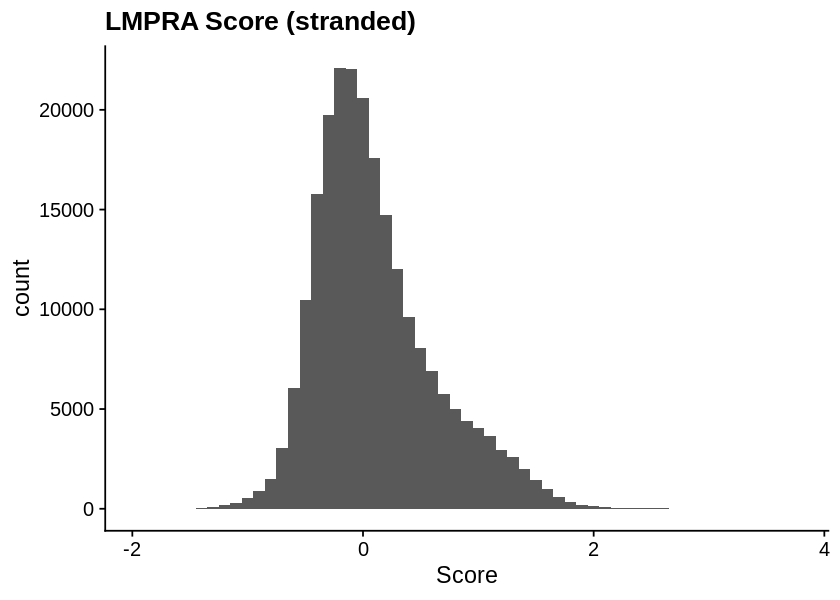

In [6]:
dat = dat_lmpra_score_stranded
gpt = ggplot(dat, aes(x=Score)) + 
    geom_histogram(binwidth = 0.1) + 
    labs(title="LMPRA Score (stranded)") +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=7)
print(gpt)

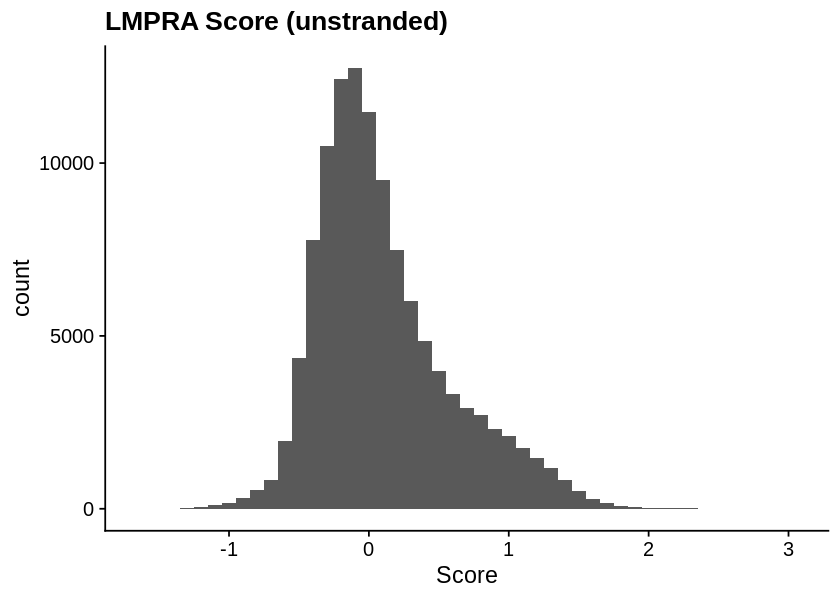

In [7]:
dat = dat_lmpra_score_unstranded
gpt = ggplot(dat, aes(x=Score)) + 
    geom_histogram(binwidth = 0.1) + 
    labs(title="LMPRA Score (unstranded)") +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=7)
print(gpt)

```
dat_cnames = data.frame(
    "Name" = c("Chrom", "Start", "End", "Name", "Score", "Strand"),
    "Description" = c("Chrom", "Start", "End", "Name", "Score", "Strand")
)
dat_cnames
```

## Save results

```
fdiry = file.path(FD_RES, "results", "LentiMPRA_K562_Nadav", "coverage")
fname = "description.tsv"
fpath = file.path(fdiry, fname)
print(fpath)

dat = dat_cnames
write_tsv(dat, fpath)
```

In [8]:
fdiry = file.path(FD_RES, "results", "LentiMPRA_K562_Nadav", "coverage")
fname = "K562.ENCSR382BVV.ENCFF348WYK.LMPRA.stranded.bed.gz"
fpath = file.path(fdiry, fname)

dat = dat_lmpra_score_stranded
dat = dat %>% dplyr::arrange(Chrom, Start, End)
write_tsv(dat, fpath)

In [9]:
fdiry = file.path(FD_RES, "results", "LentiMPRA_K562_Nadav", "coverage")
fname = "K562.ENCSR382BVV.ENCFF348WYK.LMPRA.unstranded.bed.gz"
fpath = file.path(fdiry, fname)

dat = dat_lmpra_score_unstranded
dat = dat %>% dplyr::arrange(Chrom, Start, End)
write_tsv(dat, fpath)

In [10]:
fdiry = file.path(FD_RES, "results", "LentiMPRA_K562_Nadav", "coverage")
fname = "K562.ENCSR382BVV.ENCFF348WYK.LMPRA.unstranded.bg"
fpath = file.path(fdiry, fname)

dat = dat_lmpra_score_unstranded
dat = dat %>% 
    dplyr::select(Chrom, Start, End, Score) %>% 
    dplyr::arrange(Chrom, Start, End)
write_tsv(dat, fpath)